In [15]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [16]:
# guarda en variables los datasets y su fuente
futbol = pd.read_csv('data/male_players.csv')

C:\Users\aprai\AppData\Local\Temp\ipykernel_8392\367689262.py:2: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  futbol = pd.read_csv('data/male_players.csv')


In [17]:
futbol_1 = futbol[[#'player_id', 
 # 'player_url',
 #'fifa_version',
 #'fifa_update', 'update_as_of',
 #'short_name',  #'long_name', 
 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
 # 'dob',  
 'height_cm', 'weight_kg', #'club_team_id',
 #'club_name',
 #'league_id',
 #'league_name', 'league_level', 'club_position',
 # 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id',
 #'nationality_name',
 # 'nation_team_id',
 #'nation_position',
 # 'nation_jersey_number', 
 'preferred_foot', #'weak_foot', 'skill_moves',
 #'international_reputation',
 # 'work_rate', 'body_type', 'real_face', 
 'release_clause_eur', 
 # 'player_tags', 'player_traits', 
 'pace', 
 'shooting',
 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
 'mentality_interceptions', 'mentality_positioning',  'mentality_vision', 'mentality_penalties', 'mentality_composure',
 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'
            ]].copy()

In [18]:
# Eliminar columnas de tipo object
df_numerico = futbol_1.select_dtypes(exclude=['object'])

print(df_numerico)

        overall  potential    value_eur  wage_eur  age  height_cm  weight_kg  \
0            91         94  181500000.0  230000.0   24        182         75   
1            91         94  185000000.0  340000.0   22        195         94   
2            91         91  103000000.0  350000.0   32        181         75   
3            90         90   41000000.0   23000.0   36        169         67   
4            90         90   51000000.0   95000.0   35        185         81   
...         ...        ...          ...       ...  ...        ...        ...   
180016       41         61      20000.0    2000.0   17        187         81   
180017       41         50      30000.0    2000.0   17        178         57   
180018       40         50      15000.0    2000.0   18        190         76   
180019       40         49      15000.0    2000.0   22        180         70   
180020       40         40          NaN    2000.0   41        175         72   

        release_clause_eur  pace  shoot

In [19]:
df_filled = df_numerico.fillna(df_numerico.median(numeric_only=True))
print(df_filled)

        overall  potential    value_eur  wage_eur  age  height_cm  weight_kg  \
0            91         94  181500000.0  230000.0   24        182         75   
1            91         94  185000000.0  340000.0   22        195         94   
2            91         91  103000000.0  350000.0   32        181         75   
3            90         90   41000000.0   23000.0   36        169         67   
4            90         90   51000000.0   95000.0   35        185         81   
...         ...        ...          ...       ...  ...        ...        ...   
180016       41         61      20000.0    2000.0   17        187         81   
180017       41         50      30000.0    2000.0   17        178         57   
180018       40         50      15000.0    2000.0   18        190         76   
180019       40         49      15000.0    2000.0   22        180         70   
180020       40         40     750000.0    2000.0   41        175         72   

        release_clause_eur  pace  shoot

In [20]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   overall                      180021 non-null  int64  
 1   potential                    180021 non-null  int64  
 2   value_eur                    180021 non-null  float64
 3   wage_eur                     180021 non-null  float64
 4   age                          180021 non-null  int64  
 5   height_cm                    180021 non-null  int64  
 6   weight_kg                    180021 non-null  int64  
 7   release_clause_eur           180021 non-null  float64
 8   pace                         180021 non-null  float64
 9   shooting                     180021 non-null  float64
 10  passing                      180021 non-null  float64
 11  dribbling                    180021 non-null  float64
 12  defending                    180021 non-null  float64
 13 

In [21]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_filled)
df_scaled

array([[9.44444444e-01, 9.81818182e-01, 9.35566678e-01, ...,
        1.09890110e-01, 5.37634409e-02, 5.00000000e-01],
       [9.44444444e-01, 9.81818182e-01, 9.53608008e-01, ...,
        1.09890110e-01, 6.45161290e-02, 5.00000000e-01],
       [9.44444444e-01, 9.27272727e-01, 5.30925417e-01, ...,
        9.89010989e-02, 1.29032258e-01, 5.00000000e-01],
       ...,
       [0.00000000e+00, 1.81818182e-01, 7.21653204e-05, ...,
        9.89010989e-02, 8.60215054e-02, 5.00000000e-01],
       [0.00000000e+00, 1.63636364e-01, 7.21653204e-05, ...,
        1.09890110e-01, 8.60215054e-02, 5.00000000e-01],
       [0.00000000e+00, 0.00000000e+00, 3.86084464e-03, ...,
        7.69230769e-02, 1.29032258e-01, 5.00000000e-01]])

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Filtramos filas con valores nulos en la columna 'overall'
df_clean = df_filled.dropna(subset=['overall'])

# Selección de características
features = ['potential','value_eur','wage_eur','age', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
X = df_clean[features]
y = df_clean['overall']  # Target (objetivo)

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Modelo de Random Forest (más robusto)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [24]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predicciones
lr_preds = lr_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)

# Evaluación
print("MAE - Regresión Lineal:", mean_absolute_error(y_test, lr_preds))
print("MAE - Random Forest:", mean_absolute_error(y_test, rf_preds))

print("R² - Regresión Lineal:", r2_score(y_test, lr_preds))
print("R² - Random Forest:", r2_score(y_test, rf_preds))

MAE - Regresión Lineal: 1.740302344438714
MAE - Random Forest: 0.43763058350096273
R² - Regresión Lineal: 0.8963506082178611
R² - Random Forest: 0.9885378810962667


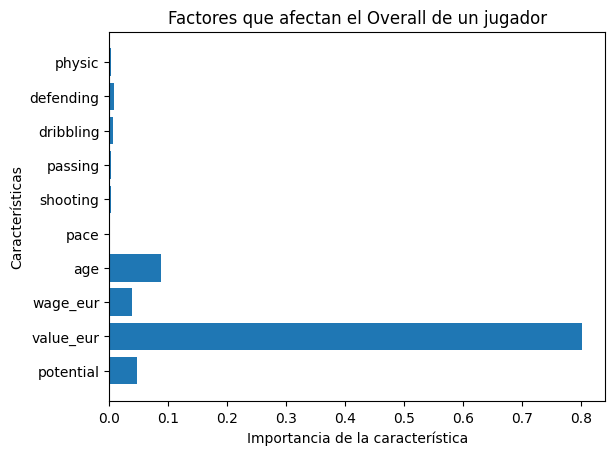

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Importancia de características en Random Forest
importance = rf_model.feature_importances_
features_np = np.array(features)

plt.barh(features_np, importance)
plt.xlabel("Importancia de la característica")
plt.ylabel("Características")
plt.title("Factores que afectan el Overall de un jugador")
plt.show()

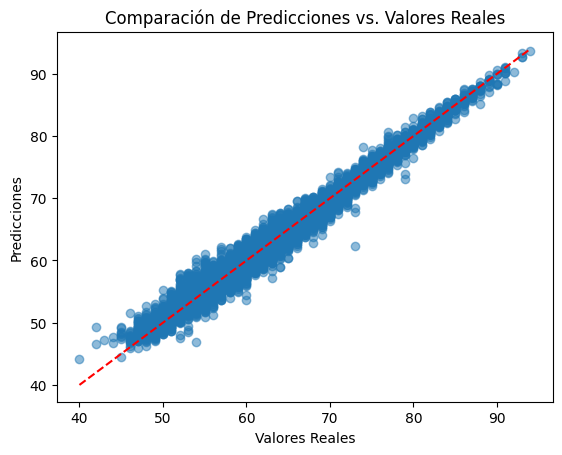

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_test, rf_preds, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de Predicciones vs. Valores Reales")
plt.show()

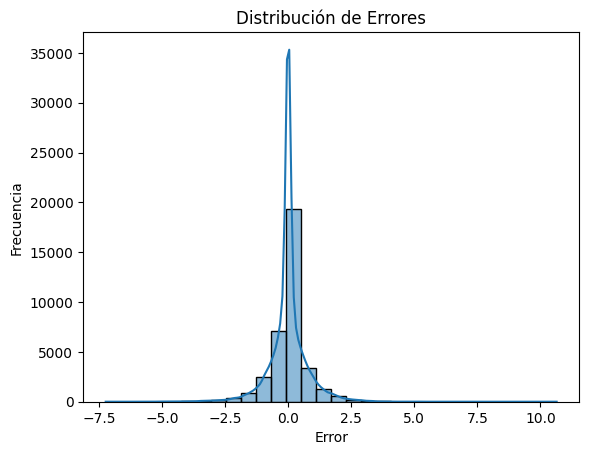

In [27]:
import seaborn as sns

errores = y_test - rf_preds
sns.histplot(errores, bins=30, kde=True)
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores")
plt.show()
